Found 1115 images belonging to 2 classes.
Found 279 images belonging to 2 classes.


/Users/antoine/PycharmProjects/tensorflow_workshop/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/antoine/PycharmProjects/tensorflow_workshop/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 355ms/step - accuracy: 0.6989 - loss: 0.5245 - val_accuracy: 0.9857 - val_loss: 0.0529
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 328ms/step - accuracy: 0.9786 - loss: 0.0558 - val_accuracy: 1.0000 - val_loss: 1.8513e-04
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 320ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 2.4016e-05
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 323ms/step - accuracy: 1.0000 - loss: 2.5770e-04 - val_accuracy: 1.0000 - val_loss: 4.4068e-05
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 322ms/step - accuracy: 1.0000 - loss: 1.6733e-04 - val_accuracy: 1.0000 - val_loss: 4.2926e-06
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 331ms/step - accuracy: 1.0000 - loss: 4.0395e-05 - val_accuracy: 1.0000 - val_loss: 2.6274e-06
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 355ms/step - accuracy: 1.0000 - loss: 4.0608e-05 - val_accuracy: 1.0000 - val_loss: 5.9139e-06
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 360ms/step - ac

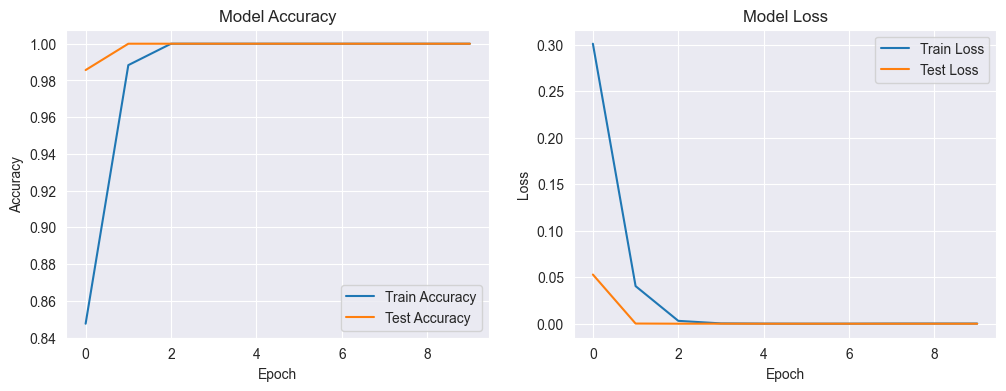

Modèle sauvegardé avec succès.


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import random
import shutil

# Dossier contenant le dataset
base_dir = 'antoine_dataset'

# Dossiers pour les ensembles d'entraînement et de test
train_dir = 'train'
test_dir = 'test'

# Nettoyer et recréer les dossiers
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

os.makedirs(os.path.join(train_dir, 'antoine_glasses'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'antoine_no_glasses'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'antoine_glasses'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'antoine_no_glasses'), exist_ok=True)

# Fonction pour diviser le dataset en ensembles d'entraînement et de test
def split_dataset(source_dir, train_dir, test_dir, split_ratio=0.8):
    for class_name in ['antoine_glasses', 'antoine_no_glasses']:
        source_class_dir = os.path.join(source_dir, class_name)
        train_class_dir = os.path.join(train_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)

        images = [
            img_name for img_name in os.listdir(source_class_dir)
            if os.path.isfile(os.path.join(source_class_dir, img_name)) and not img_name.startswith('.')
        ]
        random.shuffle(images)

        split_idx = int(len(images) * split_ratio)
        train_images = images[:split_idx]
        test_images = images[split_idx:]

        for img_name in train_images:
            src_path = os.path.join(source_class_dir, img_name)
            dest_path = os.path.join(train_class_dir, img_name)
            shutil.copy(src_path, dest_path)

        for img_name in test_images:
            src_path = os.path.join(source_class_dir, img_name)
            dest_path = os.path.join(test_class_dir, img_name)
            shutil.copy(src_path, dest_path)

# Diviser le dataset
split_dataset(base_dir, train_dir, test_dir)

# Générateurs de données pour l'entraînement et le test
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

# Définition du modèle
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Visualisation des résultats
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Sauvegarde du modèle
model.save("antoine_classification_model.h5")
print("Modèle sauvegardé avec succès.")
